In [55]:
# IMPORTING PACKAGES

import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import math
%matplotlib inline

In [56]:
# IMPORTING VOLTAGE DATA

Voltage_Data = np.genfromtxt('voltagedata.txt', delimiter='\t', skip_header=1)
print(Voltage_Data)

voltage_err = []
voltage_data = np.concatenate((Voltage_Data))

for i in range(6*len(Voltage_Data)):
   voltage_err.append(0.0005)
        
# print(voltage_err)
print(len(voltage_err))
# print(voltage_data)
print(len(voltage_data))

[[27.529 26.52  22.501 19.482 17.466 15.534]
 [30.547 28.593 24.502 21.493 19.48  17.466]
 [33.526 31.556 26.521 23.512 20.489 18.472]
 [36.555 33.526 28.539 25.512 21.494 19.481]
 [38.572 35.547 30.55  26.522 23.512 20.49 ]
 [40.592 37.564 32.568 27.53  24.504 22.502]
 [42.599 39.583 33.531 29.554 25.517 23.513]]
42
42


In [61]:
resistance = 10 # units of mO
err = 0.01

In [75]:
# ACQUIRING CURRENT DATA

current_data = []
current_err = []

resistance_data = []
resistance_err = []

def current_err_func(R, V, dR, dV):
    return (dR/R + V*dR/(R**2))

for i in range(len(voltage_data)):
    
    resistance_data.append(resistance)
    resistance_err.append(err)
        
    current_data.append(voltage_data[i]/resistance_data[i])
    current_err.append(current_err_func(resistance_data[i], voltage_data[i], resistance_err[i], voltage_err[i]))
    
print(len(current_data), len(current_err))
# print(current_data)

42 42
[2.7529, 2.652, 2.2501, 1.9482, 1.7466000000000002, 1.5534000000000001, 3.0547, 2.8593, 2.4501999999999997, 2.1492999999999998, 1.948, 1.7466000000000002, 3.3526000000000002, 3.1556, 2.6521, 2.3512, 2.0489, 1.8472000000000002, 3.6555, 3.3526000000000002, 2.8539000000000003, 2.5512, 2.1494, 1.9481000000000002, 3.8572, 3.5546999999999995, 3.055, 2.6521999999999997, 2.3512, 2.049, 4.0592, 3.7564, 3.2567999999999997, 2.753, 2.4504, 2.2502, 4.2599, 3.9583, 3.3531, 2.9554, 2.5517, 2.3513]


In [76]:
# ANODE VOLTAGE ARRAY

voltage = []

for i in range(6):
    voltage.append(20)
for i in range(6):
    voltage.append(25)
for i in range(6):
    voltage.append(30)
for i in range(6):
    voltage.append(35)
for i in range(6):
    voltage.append(40)
for i in range(6):
    voltage.append(45)
for i in range(6):
    voltage.append(50)
    
# print(voltage)

In [68]:
# RADII ARRAY

radii = [0.06/2, 0.0648/2, 0.0775/2, 0.0902/2, 0.1030/2, 0.1154/2, 0.06/2, 0.0648/2, 0.0775/2, 0.0902/2, 0.1030/2, 0.1154/2, 0.06/2, 0.0648/2, 0.0775/2, 0.0902/2, 0.1030/2, 0.1154/2, 0.06/2, 0.0648/2, 0.0775/2, 0.0902/2, 0.1030/2, 0.1154/2, 0.06/2, 0.0648/2, 0.0775/2, 0.0902/2, 0.1030/2, 0.1154/2, 0.06/2, 0.0648/2, 0.0775/2, 0.0902/2, 0.1030/2, 0.1154/2, 0.06/2, 0.0648/2, 0.0775/2, 0.0902/2, 0.1030/2, 0.1154/2]
radii_inverse_square = []

for i in range(len(radii)):
    radii_inverse_square.append(radii[i]**(-2))
    
print(len(radii_inverse_square))

constant = 1.927259344e-8 # based on well defined constants provided in the report related to the apparatus

42


In [101]:
y_data.clear()
y_err.clear()

y_data = []
y_err = []

def y_err_func(voltage, current, constant, current_error):
    return (current**2)*constant*(0.5)/(voltage**2) + 2*current*constant*(current_error)/voltage

for i in range(42):
        y_data.append(constant*current_data[i]**2/voltage[i])
        y_err.append(y_err_func(voltage[i], current_data[i], constant, current_err[i]))
        
print(len(y_data), len(y_err))
# print(radii_inverse_square)
# print(y_data)
# print(y_err)

42 42


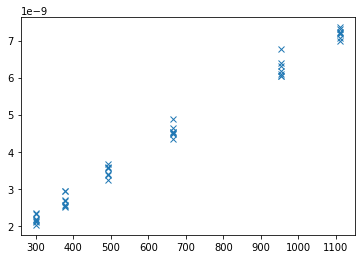

42 42


In [102]:
plt.plot(radii_inverse_square, y_data, 'x')
plt.show()
print(len(radii_inverse_square), len(y_data))

Slope: 6.217202969971812e-12 +- 9.219953203303344e-14
Intercept: 2.89315208517645e-10 +- 4.5627460371536246e-11


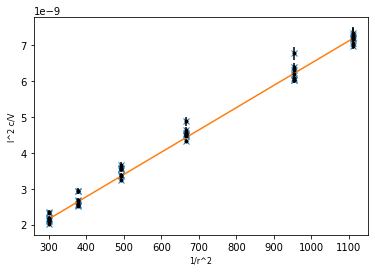

In [106]:
def func(x,m,b):                                 
    return m*x+b                                
 
initialguess = [1,1]                     
                                        
fit, covariance = optimize.curve_fit(            
        func,                                    
        radii_inverse_square,                                  
        y_data,
        initialguess,
        y_err)   

print("Slope:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("Intercept:",fit[1],"+-",np.sqrt(covariance[1][1])) 

slope = fit[0]
slope_unc = np.sqrt(covariance[0][0])

radii_inverse_squarefit=np.linspace(min(radii_inverse_square), max(radii_inverse_square), 100) 
func_plot=func(radii_inverse_squarefit,*fit)    

plt.plot(radii_inverse_square, y_data, 'x')
plt.errorbar(radii_inverse_square, y_data, y_err, fmt='k.')
plt.ylabel('I^2 c/V',fontsize = 8)
plt.xlabel('1/r^2',fontsize = 8)

plt.plot(radii_inverse_squarefit, func_plot) 

In [107]:
ratio = 1/slope
ratio_unc = (1/(slope**2))*slope_unc

print(ratio, '+-', ratio_unc)

160844033053.1036 +- 2385275927.041055
